# Figure 2: Population-Level Patterns

## Purpose
Show population-level disease signature patterns and their temporal evolution.

## Panels Required:
- **Panel A:** Heatmap of discovered signatures with top diseases for each
- **Panel B:** Patient clustering based on signature weights
- **Panel C:** Signature prevalence across age cohorts (young vs. old)
- **Panel D:** Temporal evolution of signature prevalence in population

## Key Message:
Focus on trajectory aspects, not just clusters - emphasize temporal dynamics


In [1]:
# Setup
import sys
import os
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts/new_oct_revision')

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 300

print("Setup complete")


Setup complete


## Panel A: Signature-Disease Heatmap

Show heatmap of signatures with top diseases for each. 

**Note:** We can use the existing `plot_disease_blocks` function from `utils.py` which creates heatmaps showing cluster correspondence between biobanks. This shows how diseases are assigned to signatures (clusters).


In [2]:
# Load data
from helper_py.pathway_discovery import load_full_data

# Load UKB model checkpoint to get clusters (disease-signature assignments)
import torch

# Load model checkpoints for cross-cohort comparison
# Note: plot_disease_blocks shows cluster correspondence between biobanks
# For main paper, we may want to show UKB signature-disease assignments

ukb_checkpoint_path = '/Users/sarahurbut/Dropbox-Personal/model_with_kappa_bigam.pt'
ukb_checkpoint = torch.load(ukb_checkpoint_path, map_location='cpu')

print(f"UKB checkpoint keys: {list(ukb_checkpoint.keys())}")
print(f"Number of diseases: {len(ukb_checkpoint['disease_names'])}")
print(f"Number of signatures: {ukb_checkpoint['clusters'].max() + 1 if hasattr(ukb_checkpoint['clusters'], 'max') else 'N/A'}")

# Extract clusters (disease-to-signature assignments)
clusters = ukb_checkpoint['clusters']
disease_names = ukb_checkpoint['disease_names']

# Convert to list if needed
if isinstance(disease_names, (list, tuple)):
    disease_names = list(disease_names)
elif hasattr(disease_names, 'values'):
    disease_names = disease_names.values.tolist()


UKB checkpoint keys: ['model_state_dict', 'clusters', 'initial_phi', 'initial_lambda', 'psi', 'Y', 'prevalence_t', 'logit_prevalence_t', 'G', 'E', 'indices', 'disease_names', 'hyperparameters']
Number of diseases: 348
Number of signatures: 20


In [3]:
# Create signature-disease heatmap
# Option 1: Use existing plot_disease_blocks for cross-cohort comparison
# Option 2: Create new heatmap showing UKB signature-disease assignments

# For main paper Figure 2A, we want to show:
# - Each signature (column) with top diseases (rows)
# - Diseases clustered within each signature based on their psi/phi associations

# Load psi matrix (disease-signature associations)
if 'psi' in ukb_checkpoint:
    psi = ukb_checkpoint['psi']
    print(f"Psi shape: {psi.shape}")
    
    # Create heatmap of psi values
    # Rows: diseases, Columns: signatures
    # This shows the strength of association between each disease and signature
    
    # TODO: Create publication-ready heatmap
    # - Show top diseases for each signature
    # - Cluster diseases within signatures
    # - Use appropriate color scale
    # - Add labels and legend
else:
    print("Psi matrix not found in checkpoint")
    print("Available keys:", list(ukb_checkpoint.keys()))


Psi shape: torch.Size([21, 348])


FileNotFoundError: [Errno 2] No such file or directory: 'figures/figure2_panelA_cross_cohort_correspondence.pdf'

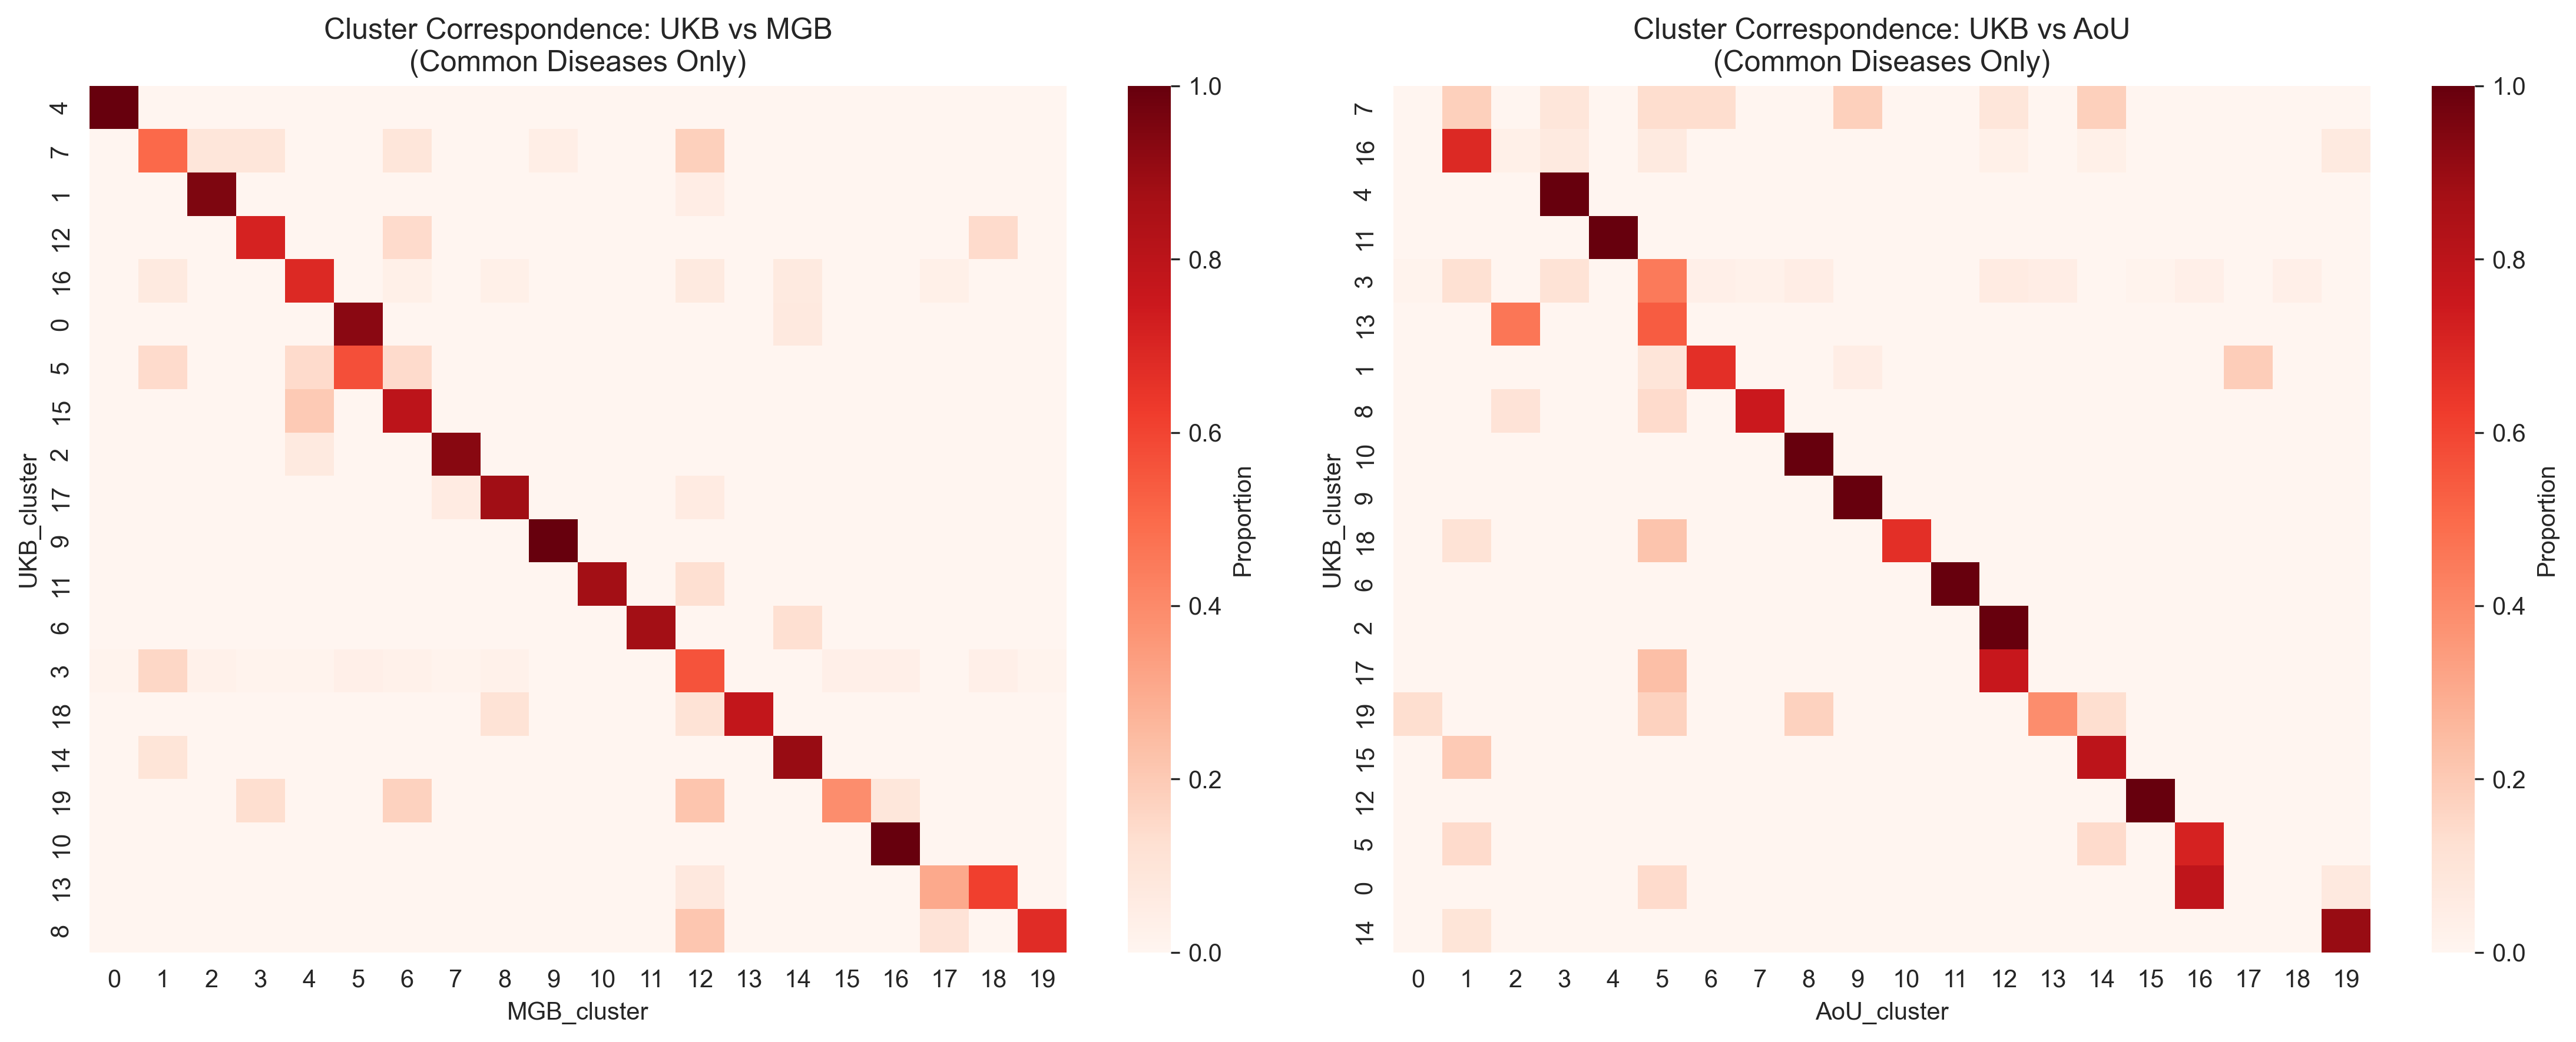

In [5]:
# Alternative: Use plot_disease_blocks for cross-cohort validation visualization
# This shows cluster correspondence between UKB, MGB, and AoU
# Useful for demonstrating signature stability across cohorts

# Uncomment to use:
sys.path.append('/Users/sarahurbut/aladynoulli2/pyScripts')
from utils import plot_disease_blocks

mgb_checkpoint = torch.load('/Users/sarahurbut/Dropbox-Personal/model_with_kappa_bigam_MGB.pt')
aou_checkpoint = torch.load('/Users/sarahurbut/Dropbox-Personal/model_with_kappa_bigam_AOU.pt')

results = plot_disease_blocks(
    mgb_checkpoint, 
    aou_checkpoint, 
    ukb_checkpoint,
    output_path='figures/figure2_panelA_cross_cohort_correspondence.pdf'
)
